In [70]:
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Step 1 Generate data

In [71]:
X,y=make_regression(n_samples=500,n_features=10,n_informative=5,noise=25.8,random_state=0)

print(X.shape,y.shape)

n_features=X.shape[1]

(500, 10) (500,)


In [72]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


Step 2  Normalisation of the data

In [73]:
def normalize(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)

    return (X-u)/std

In [74]:
X=normalize(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [75]:
X.mean(axis=0)

array([-2.90878432e-17,  6.39488462e-17, -1.90958360e-17,  4.88498131e-18,
        1.93872696e-17,  4.99600361e-17,  9.00668429e-18,  8.88178420e-19,
        9.90318938e-17, -1.11910481e-16])

In [76]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
X.shape

(500, 10)

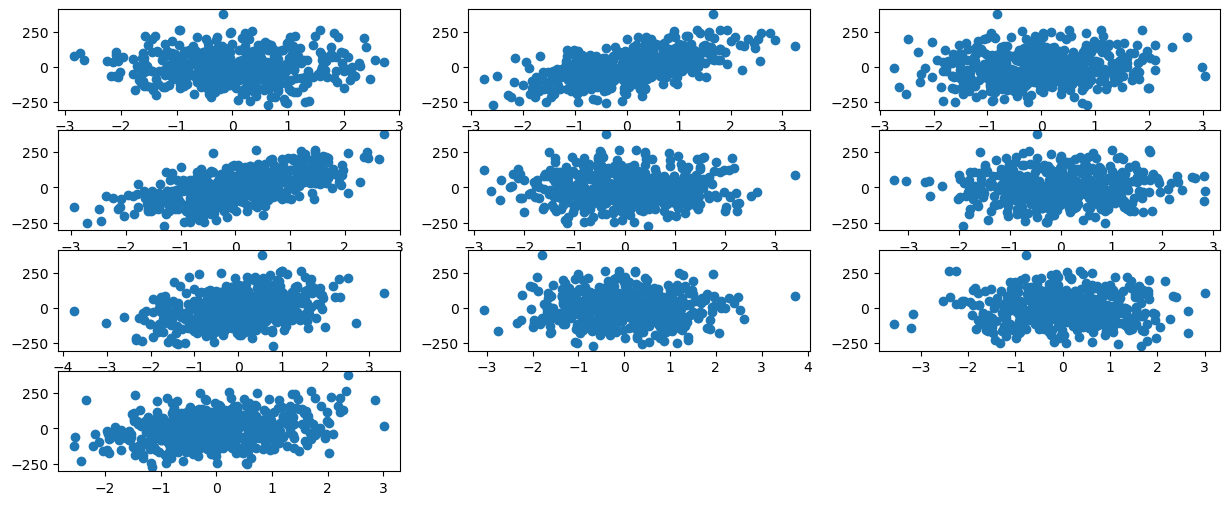

In [78]:
for feature in range(0,10):
    plt.subplot(4,3,feature+1)
    plt.scatter(X[:,feature],y)

plt.show()

step 3 train and test split

In [79]:
XT, Xt, yT, yt=train_test_split(X,y,random_state=0,test_size=0.3,shuffle=False)

In [80]:
print(XT.shape,yT.shape)

(350, 10) (350,)


define preprocess x function need the column of 1's     

In [81]:
def preproccess(X):
    if(X.shape[1]==n_features):
        m=X.shape[0]
        ones=np.ones((m,1))
        X=np.hstack((ones,X))

    return X
    

In [82]:
pd.DataFrame(preproccess(X)).head()
XT=preproccess(XT)
Xt=preproccess(Xt)

Hypothesis function

In [83]:
def hypothesis(X,theta):
    # will give the X matrix will include one more with unit values and also theta will also carry theta(0) on the first row itelf
    return np.dot(X,theta)

In [84]:
def loss(X,y,theta):
    m=X.shape[0]
    yp=hypothesis(X,theta)
    exp=np.sum((y-yp)**2)  
    return exp/(2*m)
 

In [85]:
def gradient(X,y,theta):
    yp=hypothesis(X,theta)
    grad=np.dot(X.T,(yp-y))
    m=X.shape[0]
    return grad/m



In [86]:
def train(X,y,learning_rate=0.1,max_itrs=100):
    n=X.shape[1]
    theta=np.random.randn(n)
    error_list=[]
    for i in range(max_itrs):
        e=loss(X,y,theta)
        error_list.append(e)
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    plt.plot(error_list)
    return theta,error_list

    

[-5.15787655 -0.26658795 61.81934639 11.37825885 65.52681025 -0.48100249
  0.93763931 41.17540545  0.54491197  0.75634851 22.42708049]


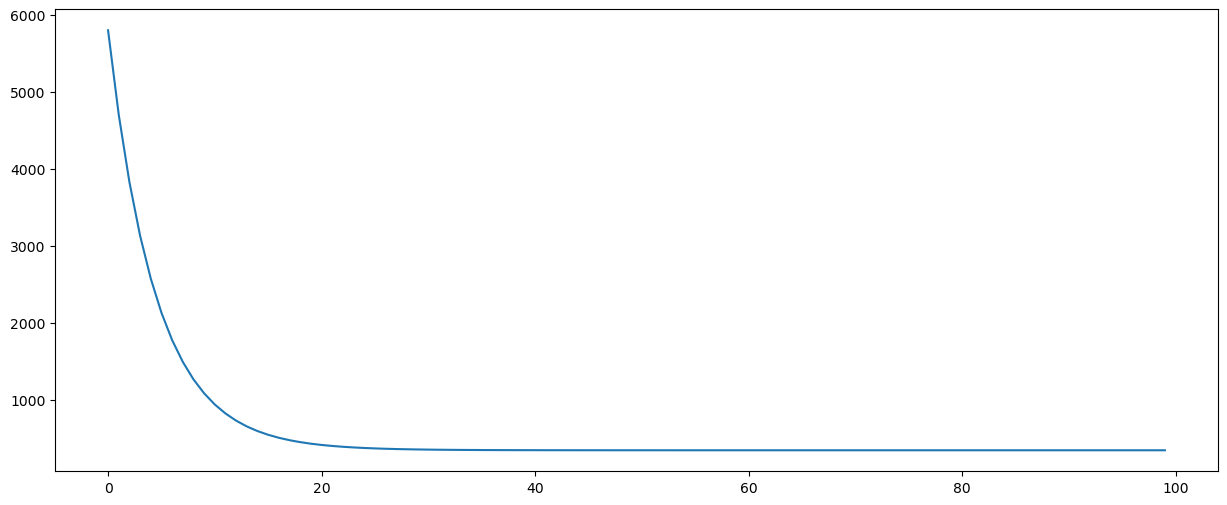

In [87]:
theta,error_list=train(XT,yT)
print(theta)

In [96]:
error_list

[5799.839866251676,
 4703.84842832647,
 3830.2756395172323,
 3133.5974234527503,
 2577.68038089312,
 2133.830811541456,
 1779.2517295254186,
 1495.822035571696,
 1269.1301688607152,
 1087.7088596551414,
 942.428865241179,
 826.0184445888523,
 732.6823205674428,
 657.7993926579072,
 597.6828124179648,
 549.3894658148355,
 510.56861550629606,
 479.34159531995704,
 454.2061390638225,
 433.96026129064865,
 417.64166348039055,
 404.4794741968059,
 393.8557925422305,
 385.27502728741416,
 378.33943826893875,
 372.72961481324216,
 368.18888605283206,
 364.5108642532778,
 361.5294858923501,
 359.1110450953488,
 357.14781714633233,
 355.55295171072584,
 354.2563805099402,
 353.2015359578079,
 352.3427184535096,
 351.6429828063193,
 351.07244037189946,
 350.60689427822905,
 350.226741698559,
 349.9160903517281,
 349.6620469617706,
 349.45414383313783,
 349.283876427502,
 349.1443302068822,
 349.02987930925923,
 348.935943064641,
 348.8587891150519,
 348.79537410925377,
 348.74321471223516,
 348.

In [88]:
def r2score(y,yp):
    # np.sum will automatically calculate the sum of the elements present in the vector 
    # so we don't have to iterate over all the elements
    num=np.sum((y-yp)**2)
    denom=np.sum((y-y.mean())**2)

    return 1-(num/denom)

In [89]:
r2score(yt,hypothesis(Xt,theta))

0.9321410843633866

linear regression using sklearn

In [90]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

# fit function helps us train the model in the 
model.fit(XT,yT)

LinearRegression()

calculate the hypothesis function value

In [91]:
yp=model.predict(Xt)

calculate r2 score

In [92]:
model.score(Xt,yt)

0.9321372696807685

intercept values ie. theta(0)

In [93]:
model.intercept_

-5.158503973851915

slope values ie. theta(1)

In [94]:
model.coef_

array([ 0.        , -0.26596171, 61.82000908, 11.38081141, 65.53046157,
       -0.48290608,  0.93519408, 41.17878075,  0.54622406,  0.75372546,
       22.42407857])

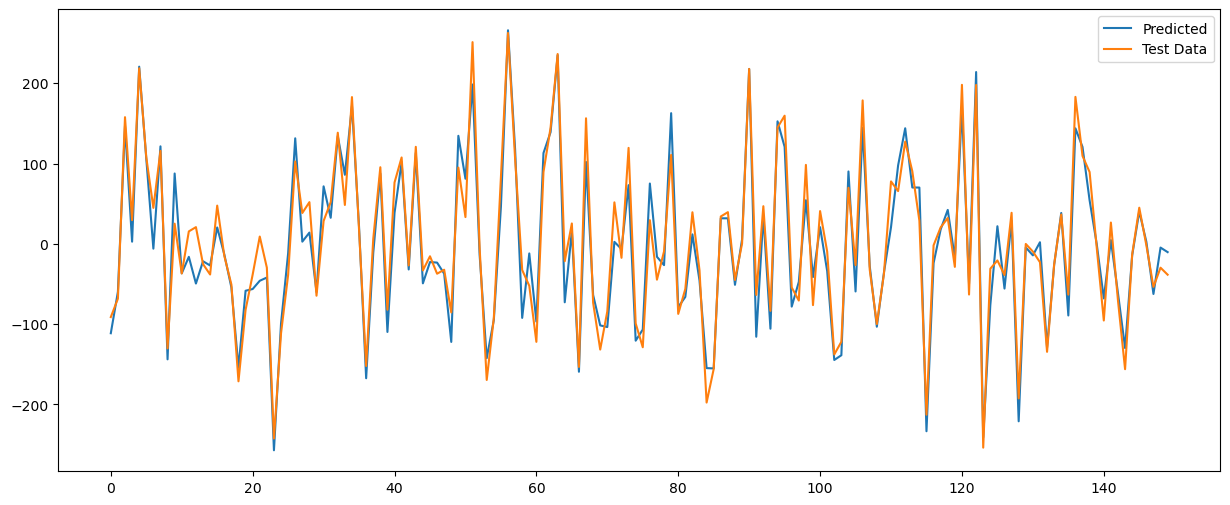

In [95]:
plt.rcParams['figure.figsize']=(15,6)
plt.plot(yp,label="Predicted")
plt.plot(yt,label="Test Data")
plt.legend()
plt.show()